In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=50,centers=2, random_state=0, cluster_std=0.60)

Working with Linearly separable dataset

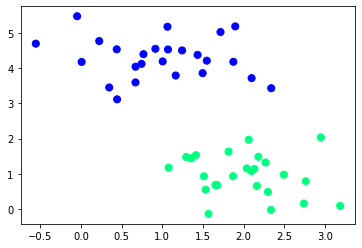

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [10]:
from sklearn.svm import SVC  #Support Vector Classifier
model=SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [16]:
model.predict([[1.41281595, 1.5303347 ]])

array([1])

In [14]:
X[0]

array([1.41281595, 1.5303347 ])

In [13]:
y[0]

1

In [17]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P, colors='k',levels=[-1,0,1],
              alpha=0.5,linestyles=['--','-','--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300,linewidth=1,facecolors='none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

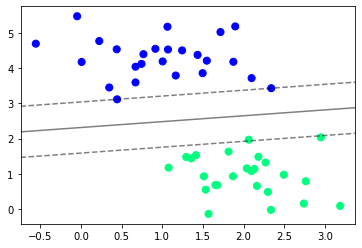

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model);

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

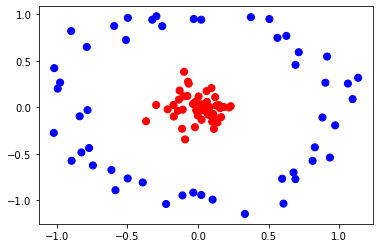

In [23]:
from sklearn.datasets import make_circles
X,y=make_circles(100, factor=.1,noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,y_train.ravel())
y_pred=classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4

In [33]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [34]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

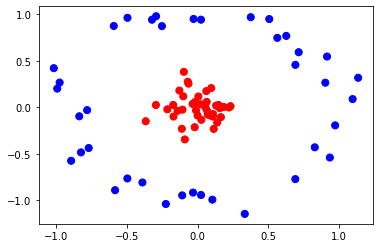

In [28]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=50,cmap='bwr')

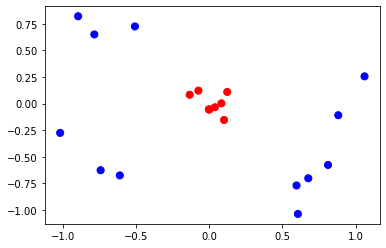

In [29]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s=50,cmap='bwr')

In [30]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


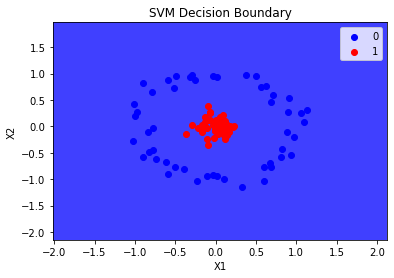

In [32]:
plot_decision_boundary(X,y,classifier)

In [37]:
def plot_3d_plot(x,y):
    r=np.exp(-(x**2).sum(1))
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    return ax

<Axes3DSubplot:xlabel='x1', ylabel='x2'>

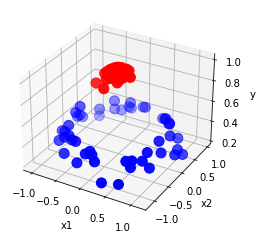

In [38]:
plot_3d_plot(X,y)

In [39]:
rbf_classifier=SVC(kernel='rbf')
rbf_classifier.fit(X_train,y_train)
y_pred=rbf_classifier.predict(X_test)

In [40]:
accuracy_score(y_pred,y_test)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


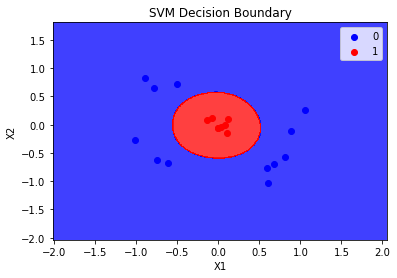

In [43]:
plot_decision_boundary(X_test,y_test,rbf_classifier)

In [60]:
poly_classifier=SVC(kernel='poly',degree=2)
poly_classifier.fit(X_train,y_train)
y_pred=poly_classifier.predict(X_test)

In [61]:
accuracy_score(y_pred,y_test)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


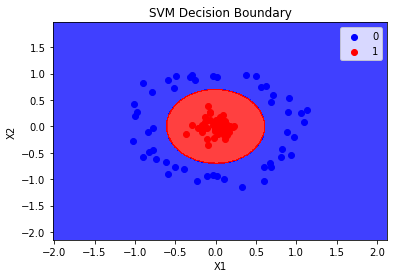

In [62]:
plot_decision_boundary(X,y,poly_classifier)